# How to choose categorical columns in dataset

## Load Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.simplefilter(action='ignore')

In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [0]:
churn_df = churn_master_df.copy()

In [10]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes




customerID - Customer ID

gender - Whether the customer is a male or a female

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)


## Feature Selection

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7032 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [12]:
print("Number of Rows: %s "%(churn_df.shape[0]))
print("Number of Columns: %s "%(churn_df.shape[1]))
print("\n Features: ", churn_df.columns.to_list())
print("\n Missing Values: %s"%(churn_df.isnull().any()))
print("\n Unique values: %s"%(churn_df.nunique()))

Number of Rows: 7043 
Number of Columns: 10 

 Features:  ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing Values: customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

 Unique values: customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


## Null Hypothesis: -
There is no relationship between the two categorical values.


## Alternate Hypothesis: -
There is a relationship between the two categorical values.

Use p value = 0.05 to make the decision

Questions to answer: -

- Is there any relationship between users who have churned to genders of the user ?

- Is there any relationship between users who opted for paperless billing to users who have churned ?

# Chi-Squared Test: -

There are multiple relationship tests that are available. But here we use the chi-squared test.

This test can be applied to any 2 categorical columns. It need not be supervised/unsupervised.

Chi-squared test shows the significance of the relationship between two categorical data.

In [13]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

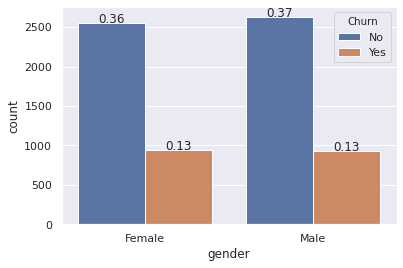

In [14]:
fig, ax = plt.subplots()
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+3, '{:1.2f}'.format(height/churn_df.shape[0]), ha="center")


## Is there any relationship between users who have churned to genders of the user ?

Statistics alone do not prove anything. All tests are relative likelihood


- To do a chi-squared test. We need to create a contigency table.

- Also called cross-tab.


In [0]:
gender_churn_ct = pd.crosstab(index=churn_df["gender"], columns=churn_df["Churn"])

In [16]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [18]:
print(gender_churn_ct.iloc[0].values)
print(gender_churn_ct.iloc[1].values)

[2549  939]
[2625  930]


In [0]:
from scipy import stats

 scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)

Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table [1] observed. 

The expected frequencies are computed based on the marginal sums under the assumption of independence; see scipy.stats.contingency.expected_freq.

The number of degrees of freedom is (expressed using numpy functions and attributes):

In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [21]:
print("chi2: ",chi2)
print("p-value: ",p)
print("Degree of freedom",dof)

chi2:  0.4840828822091383
p-value:  0.48657873605618596
Degree of freedom 1


chi ^ 2 statistics =

X ^ 2 = sum((observed - Expected) ^ 2 / Expected)

Higher the chi2 value more is the correlation between the two variables.

dof is number of categories - 1


p-value > 0.05
hence we do not accept the alternate hypothesis and choose the null hypothesis.

That means we can drop the gender column it is not very useful.

In [22]:
pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


## Is there any relationship between users who opted for paperless billing to users who have churned ?

In [23]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

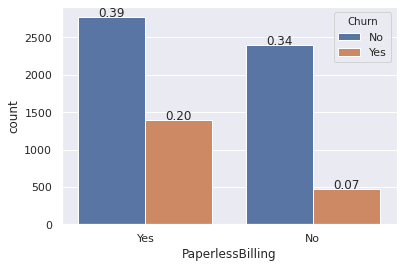

In [24]:
fig, ax = plt.subplots()
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+3, '{:1.2f}'.format(height/churn_df.shape[0]), ha="center")


In [0]:
pb_churn_ct = pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'])

In [26]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [27]:
print(pb_churn_ct.iloc[0])
print(pb_churn_ct.iloc[1])

Churn
No     2403
Yes     469
Name: No, dtype: int64
Churn
No     2771
Yes    1400
Name: Yes, dtype: int64


In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([pb_churn_ct.iloc[0].values, pb_churn_ct.iloc[1].values])

In [29]:
print("chi2: ",chi2)
print("p-value: ",p)
print("Degree of freedom",dof)

chi2:  258.27764906707307
p-value:  4.073354668665985e-58
Degree of freedom 1


Practically it may not make much sense.

But here p-value < 0.05 hence we reject the null hypothesis in favour of alternate hypothesis.

That is there is a significant relationship in this data.